From all tables in every method, the result of classification can be averaged using the formula:

$$
\text{Average Accuracy} = \frac{\text{Total sum of all accuracy aspects}}{\text{Number of aspects}}
$$

--- Average Score Calculation Results ---
   Classifier Feature_Extraction  Precision  Recall  F-Score  Accuracy
0      Hybrid                BoW      0.924   0.934    0.929     0.934
1      Hybrid             TF-IDF      0.924   0.934    0.928     0.934
2      Hybrid           Word2Vec      0.833   0.857    0.829     0.857
3        K-NN                BoW      0.846   0.854    0.848     0.854
4        K-NN             TF-IDF      0.808   0.786    0.795     0.786
5        K-NN           Word2Vec      0.770   0.680    0.710     0.683
6          NB                BoW      0.872   0.762    0.803     0.762
7          NB             TF-IDF      0.851   0.743    0.786     0.743
8          RF                BoW      0.926   0.930    0.928     0.927
9          RF             TF-IDF      0.927   0.923    0.923     0.923
10         RF           Word2Vec      0.860   0.848    0.841     0.846
11        SVM                BoW      0.927   0.929    0.927     0.929
12        SVM             TF-IDF   

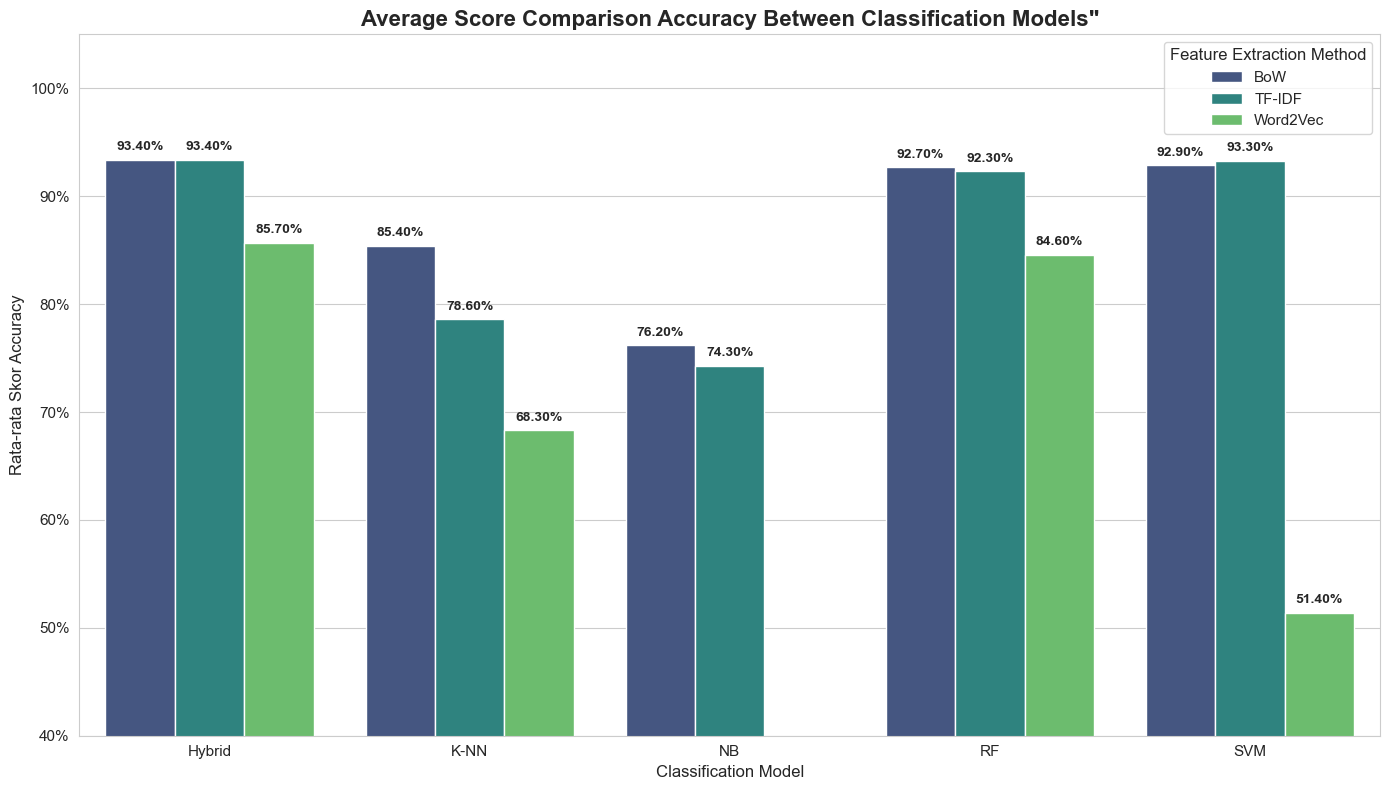

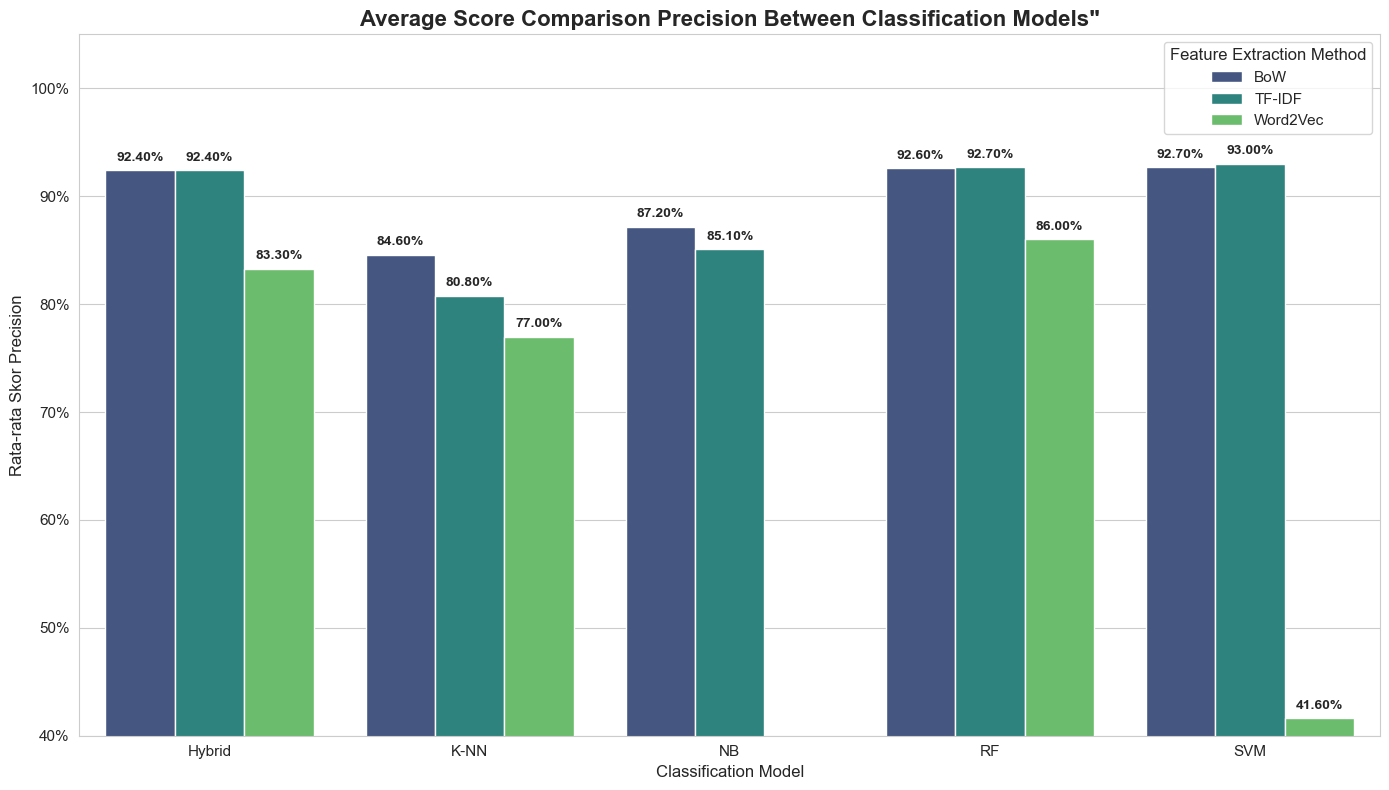

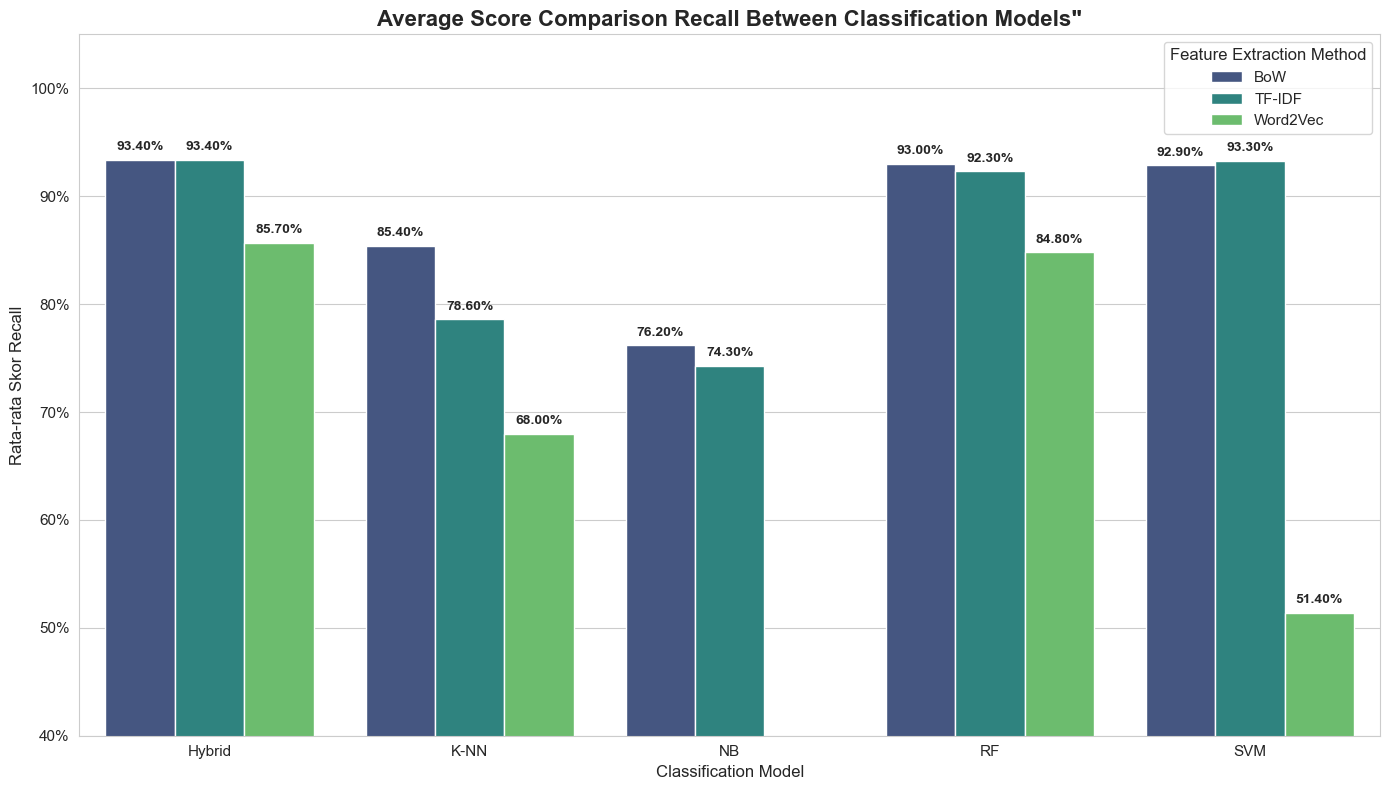

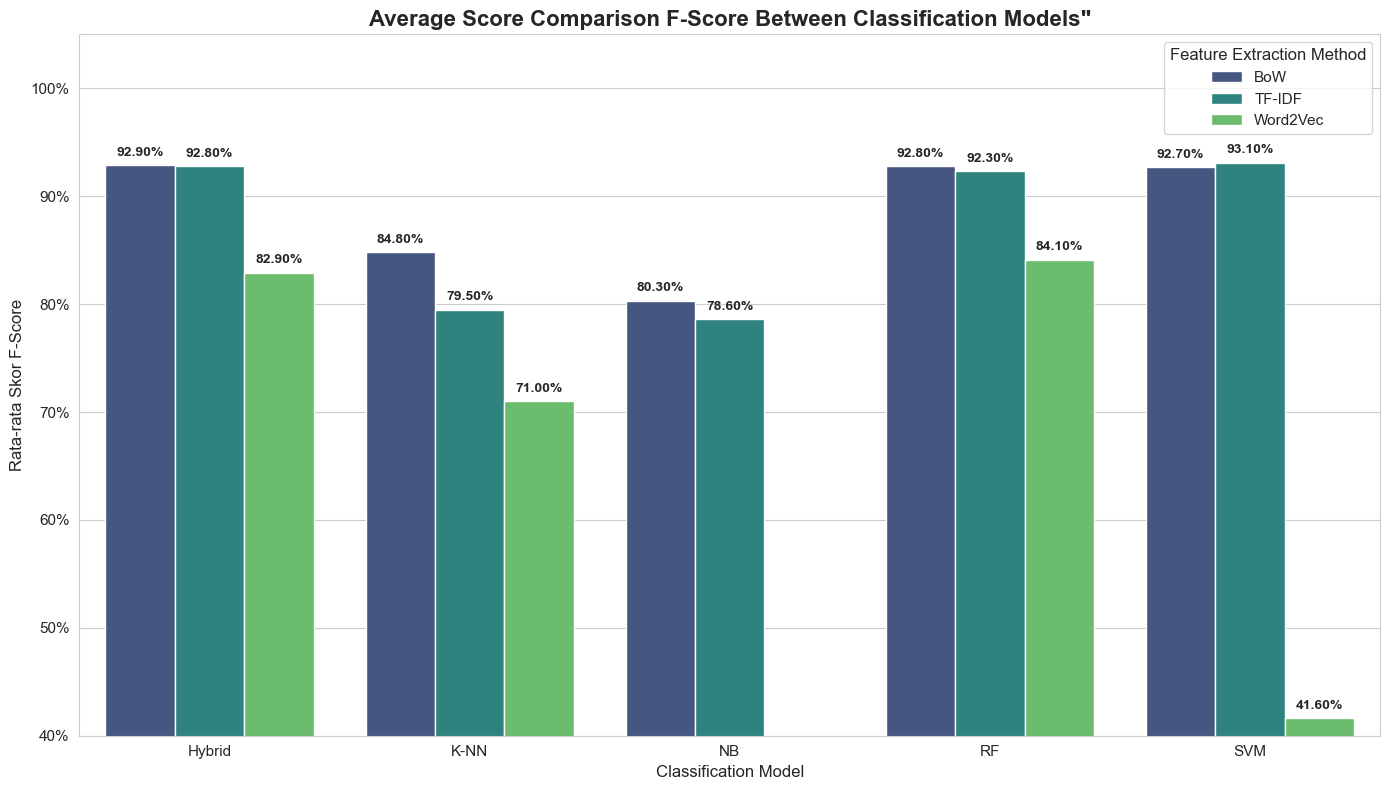

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- LANGKAH 1: Memasukkan Semua Data Mentah dari Tabel 4.6 dan 4.7 ---
# Data ini ditranskripsi secara lengkap dari gambar tabel yang Anda berikan.
# Ini memastikan semua perhitungan didasarkan pada sumber yang asli.

raw_data = [
    # Data dari Tabel 4.6 (Base Classifiers)
    # Feature Extraction: BoW
    {'Aspect': 'AC', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.96, 'Recall': 0.97, 'F-Score': 0.97, 'Accuracy': 0.96},
    {'Aspect': 'AC', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.97, 'Recall': 0.97, 'F-Score': 0.97, 'Accuracy': 0.97},
    {'Aspect': 'AC', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.91, 'Recall': 0.93, 'F-Score': 0.92, 'Accuracy': 0.93},
    {'Aspect': 'AC', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.90, 'Recall': 0.77, 'F-Score': 0.82, 'Accuracy': 0.77},
    {'Aspect': 'air.panas', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.95, 'Recall': 0.96, 'F-Score': 0.96, 'Accuracy': 0.96},
    {'Aspect': 'air.panas', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'air.panas', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.90, 'Recall': 0.94, 'F-Score': 0.92, 'Accuracy': 0.94},
    {'Aspect': 'air.panas', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.91, 'Recall': 0.80, 'F-Score': 0.84, 'Accuracy': 0.80},
    {'Aspect': 'bau', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.93, 'Recall': 0.92, 'F-Score': 0.92, 'Accuracy': 0.92},
    {'Aspect': 'bau', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.94, 'Recall': 0.93, 'F-Score': 0.93, 'Accuracy': 0.93},
    {'Aspect': 'bau', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.89, 'Recall': 0.85, 'F-Score': 0.86, 'Accuracy': 0.85},
    {'Aspect': 'bau', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.88, 'Recall': 0.77, 'F-Score': 0.81, 'Accuracy': 0.77},
    {'Aspect': 'general', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.88, 'Recall': 0.89, 'F-Score': 0.88, 'Accuracy': 0.88},
    {'Aspect': 'general', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.87, 'Recall': 0.87, 'F-Score': 0.87, 'Accuracy': 0.87},
    {'Aspect': 'general', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.80, 'Recall': 0.83, 'F-Score': 0.81, 'Accuracy': 0.83},
    {'Aspect': 'general', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.82, 'Recall': 0.70, 'F-Score': 0.74, 'Accuracy': 0.70},
    {'Aspect': 'Kebersihan', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.86, 'Recall': 0.86, 'F-Score': 0.86, 'Accuracy': 0.86},
    {'Aspect': 'Kebersihan', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.85, 'Recall': 0.85, 'F-Score': 0.85, 'Accuracy': 0.85},
    {'Aspect': 'Kebersihan', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.72, 'Recall': 0.72, 'F-Score': 0.71, 'Accuracy': 0.72},
    {'Aspect': 'Kebersihan', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.79, 'Recall': 0.68, 'F-Score': 0.71, 'Accuracy': 0.68},
    {'Aspect': 'Linen', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.89, 'Recall': 0.89, 'F-Score': 0.88, 'Accuracy': 0.88},
    {'Aspect': 'Linen', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.87, 'Recall': 0.90, 'F-Score': 0.88, 'Accuracy': 0.90},
    {'Aspect': 'Linen', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.75, 'Recall': 0.76, 'F-Score': 0.76, 'Accuracy': 0.76},
    {'Aspect': 'Linen', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.84, 'Recall': 0.73, 'F-Score': 0.77, 'Accuracy': 0.73},
    {'Aspect': 'service', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.91, 'Recall': 0.91, 'F-Score': 0.91, 'Accuracy': 0.91},
    {'Aspect': 'service', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.88, 'Recall': 0.89, 'F-Score': 0.89, 'Accuracy': 0.89},
    {'Aspect': 'service', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.79, 'Recall': 0.80, 'F-Score': 0.79, 'Accuracy': 0.80},
    {'Aspect': 'service', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.83, 'Recall': 0.76, 'F-Score': 0.78, 'Accuracy': 0.76},
    {'Aspect': 'sunrise.meal', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'sunrise.meal', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.97, 'Recall': 0.96, 'F-Score': 0.96, 'Accuracy': 0.96},
    {'Aspect': 'sunrise.meal', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.90, 'Recall': 0.92, 'F-Score': 0.91, 'Accuracy': 0.92},
    {'Aspect': 'sunrise.meal', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.89, 'Recall': 0.74, 'F-Score': 0.81, 'Accuracy': 0.74},
    {'Aspect': 'TV', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.96, 'Recall': 0.97, 'F-Score': 0.97, 'Accuracy': 0.97},
    {'Aspect': 'TV', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.98, 'Recall': 0.98, 'F-Score': 0.98, 'Accuracy': 0.98},
    {'Aspect': 'TV', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.89, 'Recall': 0.90, 'F-Score': 0.90, 'Accuracy': 0.90},
    {'Aspect': 'TV', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.92, 'Recall': 0.82, 'F-Score': 0.86, 'Accuracy': 0.82},
    {'Aspect': 'Wifi', 'Classifier': 'RF', 'Feature_Extraction': 'BoW', 'Precision': 0.97, 'Recall': 0.98, 'F-Score': 0.98, 'Accuracy': 0.98},
    {'Aspect': 'Wifi', 'Classifier': 'SVM', 'Feature_Extraction': 'BoW', 'Precision': 0.99, 'Recall': 0.99, 'F-Score': 0.99, 'Accuracy': 0.99},
    {'Aspect': 'Wifi', 'Classifier': 'K-NN', 'Feature_Extraction': 'BoW', 'Precision': 0.91, 'Recall': 0.89, 'F-Score': 0.90, 'Accuracy': 0.89},
    {'Aspect': 'Wifi', 'Classifier': 'NB', 'Feature_Extraction': 'BoW', 'Precision': 0.94, 'Recall': 0.85, 'F-Score': 0.89, 'Accuracy': 0.85},

    # Feature Extraction: TF-IDF
    {'Aspect': 'AC', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.97, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'AC', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.97, 'Recall': 0.97, 'F-Score': 0.97, 'Accuracy': 0.97},
    {'Aspect': 'AC', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.83, 'Recall': 0.82, 'F-Score': 0.82, 'Accuracy': 0.82},
    {'Aspect': 'AC', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.88, 'Recall': 0.71, 'F-Score': 0.78, 'Accuracy': 0.71},
    {'Aspect': 'air.panas', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.96, 'Recall': 0.96, 'F-Score': 0.96, 'Accuracy': 0.96},
    {'Aspect': 'air.panas', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'air.panas', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.82, 'Recall': 0.84, 'F-Score': 0.83, 'Accuracy': 0.84},
    {'Aspect': 'air.panas', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.78, 'F-Score': 0.83, 'Accuracy': 0.78},
    {'Aspect': 'bau', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.93, 'Recall': 0.93, 'F-Score': 0.93, 'Accuracy': 0.93},
    {'Aspect': 'bau', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.93, 'Recall': 0.93, 'F-Score': 0.93, 'Accuracy': 0.93},
    {'Aspect': 'bau', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.79, 'Recall': 0.79, 'F-Score': 0.80, 'Accuracy': 0.79},
    {'Aspect': 'bau', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.87, 'Recall': 0.76, 'F-Score': 0.81, 'Accuracy': 0.76},
    {'Aspect': 'general', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.89, 'Recall': 0.89, 'F-Score': 0.89, 'Accuracy': 0.89},
    {'Aspect': 'general', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.87, 'Recall': 0.87, 'F-Score': 0.87, 'Accuracy': 0.87},
    {'Aspect': 'general', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.77, 'Recall': 0.76, 'F-Score': 0.77, 'Accuracy': 0.76},
    {'Aspect': 'general', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.82, 'Recall': 0.68, 'F-Score': 0.73, 'Accuracy': 0.68},
    {'Aspect': 'Kebersihan', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.84, 'Recall': 0.83, 'F-Score': 0.83, 'Accuracy': 0.83},
    {'Aspect': 'Kebersihan', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.87, 'Recall': 0.87, 'F-Score': 0.87, 'Accuracy': 0.87},
    {'Aspect': 'Kebersihan', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.64, 'Recall': 0.59, 'F-Score': 0.61, 'Accuracy': 0.59},
    {'Aspect': 'Kebersihan', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.78, 'Recall': 0.62, 'F-Score': 0.66, 'Accuracy': 0.62},
    {'Aspect': 'Linen', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.89, 'Recall': 0.87, 'F-Score': 0.87, 'Accuracy': 0.87},
    {'Aspect': 'Linen', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.89, 'Recall': 0.91, 'F-Score': 0.90, 'Accuracy': 0.91},
    {'Aspect': 'Linen', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.77, 'Recall': 0.76, 'F-Score': 0.76, 'Accuracy': 0.76},
    {'Aspect': 'Linen', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.84, 'Recall': 0.71, 'F-Score': 0.75, 'Accuracy': 0.71},
    {'Aspect': 'service', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.90, 'F-Score': 0.90, 'Accuracy': 0.90},
    {'Aspect': 'service', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.90, 'F-Score': 0.90, 'Accuracy': 0.90},
    {'Aspect': 'service', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.73, 'Recall': 0.70, 'F-Score': 0.71, 'Accuracy': 0.70},
    {'Aspect': 'service', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.74, 'Recall': 0.74, 'F-Score': 0.77, 'Accuracy': 0.74},
    {'Aspect': 'sunrise.meal', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'sunrise.meal', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.96, 'Recall': 0.96, 'F-Score': 0.96, 'Accuracy': 0.96},
    {'Aspect': 'sunrise.meal', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.88, 'F-Score': 0.89, 'Accuracy': 0.88},
    {'Aspect': 'sunrise.meal', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.74, 'F-Score': 0.81, 'Accuracy': 0.74},
    {'Aspect': 'TV', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.96, 'Recall': 0.97, 'F-Score': 0.97, 'Accuracy': 0.97},
    {'Aspect': 'TV', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.97, 'Recall': 0.98, 'F-Score': 0.97, 'Accuracy': 0.98},
    {'Aspect': 'TV', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.90, 'Recall': 0.90, 'F-Score': 0.90, 'Accuracy': 0.90},
    {'Aspect': 'TV', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.92, 'Recall': 0.83, 'F-Score': 0.86, 'Accuracy': 0.83},
    {'Aspect': 'Wifi', 'Classifier': 'RF', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.98, 'Recall': 0.98, 'F-Score': 0.98, 'Accuracy': 0.98},
    {'Aspect': 'Wifi', 'Classifier': 'SVM', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.99, 'Recall': 0.99, 'F-Score': 0.99, 'Accuracy': 0.99},
    {'Aspect': 'Wifi', 'Classifier': 'K-NN', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.93, 'Recall': 0.82, 'F-Score': 0.86, 'Accuracy': 0.82},
    {'Aspect': 'Wifi', 'Classifier': 'NB', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.86, 'Recall': 0.86, 'F-Score': 0.86, 'Accuracy': 0.86},

    # Feature Extraction: Word2Vec
    {'Aspect': 'AC', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.90, 'Recall': 0.88, 'F-Score': 0.88, 'Accuracy': 0.88},
    {'Aspect': 'AC', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.41, 'Recall': 0.53, 'F-Score': 0.41, 'Accuracy': 0.53},
    {'Aspect': 'AC', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.83, 'Recall': 0.71, 'F-Score': 0.75, 'Accuracy': 0.71},
    {'Aspect': 'air.panas', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.92, 'Recall': 0.92, 'F-Score': 0.91, 'Accuracy': 0.92},
    {'Aspect': 'air.panas', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.74, 'Recall': 0.81, 'F-Score': 0.74, 'Accuracy': 0.81},
    {'Aspect': 'air.panas', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.87, 'Recall': 0.80, 'F-Score': 0.80, 'Accuracy': 0.83},
    {'Aspect': 'bau', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.87, 'Recall': 0.87, 'F-Score': 0.85, 'Accuracy': 0.85},
    {'Aspect': 'bau', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.45, 'Recall': 0.57, 'F-Score': 0.45, 'Accuracy': 0.57},
    {'Aspect': 'bau', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.80, 'Recall': 0.65, 'F-Score': 0.70, 'Accuracy': 0.65},
    {'Aspect': 'general', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.86, 'Recall': 0.85, 'F-Score': 0.85, 'Accuracy': 0.85},
    {'Aspect': 'general', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.36, 'Recall': 0.44, 'F-Score': 0.36, 'Accuracy': 0.44},
    {'Aspect': 'general', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.65, 'Recall': 0.65, 'F-Score': 0.69, 'Accuracy': 0.65},
    {'Aspect': 'Kebersihan', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.68, 'Recall': 0.70, 'F-Score': 0.68, 'Accuracy': 0.70},
    {'Aspect': 'Kebersihan', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.41, 'Recall': 0.49, 'F-Score': 0.41, 'Accuracy': 0.49},
    {'Aspect': 'Kebersihan', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.67, 'Recall': 0.57, 'F-Score': 0.60, 'Accuracy': 0.57},
    {'Aspect': 'Linen', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.83, 'Recall': 0.83, 'F-Score': 0.81, 'Accuracy': 0.83},
    {'Aspect': 'Linen', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.26, 'Recall': 0.36, 'F-Score': 0.26, 'Accuracy': 0.36},
    {'Aspect': 'Linen', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.73, 'Recall': 0.66, 'F-Score': 0.68, 'Accuracy': 0.66},
    {'Aspect': 'service', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.81, 'Recall': 0.78, 'F-Score': 0.78, 'Accuracy': 0.78},
    {'Aspect': 'service', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.44, 'Recall': 0.50, 'F-Score': 0.44, 'Accuracy': 0.50},
    {'Aspect': 'service', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.54, 'Recall': 0.58, 'F-Score': 0.54, 'Accuracy': 0.58},
    {'Aspect': 'sunrise.meal', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.92, 'Recall': 0.89, 'F-Score': 0.89, 'Accuracy': 0.89},
    {'Aspect': 'sunrise.meal', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.34, 'Recall': 0.46, 'F-Score': 0.34, 'Accuracy': 0.46},
    {'Aspect': 'sunrise.meal', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.88, 'Recall': 0.71, 'F-Score': 0.78, 'Accuracy': 0.71},
    {'Aspect': 'TV', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.91, 'Recall': 0.88, 'F-Score': 0.88, 'Accuracy': 0.88},
    {'Aspect': 'TV', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.27, 'Recall': 0.38, 'F-Score': 0.27, 'Accuracy': 0.38},
    {'Aspect': 'TV', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.86, 'Recall': 0.78, 'F-Score': 0.81, 'Accuracy': 0.78},
    {'Aspect': 'Wifi', 'Classifier': 'RF', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.90, 'Recall': 0.88, 'F-Score': 0.88, 'Accuracy': 0.88},
    {'Aspect': 'Wifi', 'Classifier': 'SVM', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.48, 'Recall': 0.60, 'F-Score': 0.48, 'Accuracy': 0.60},
    {'Aspect': 'Wifi', 'Classifier': 'K-NN', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.87, 'Recall': 0.69, 'F-Score': 0.75, 'Accuracy': 0.69},
    # Data NB untuk Word2Vec tidak ada di Tabel 4.6, jadi tidak dimasukkan.

    # Data dari Tabel 4.7 (Hybrid Classifier)
    {'Aspect': 'AC', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.94, 'Recall': 0.97, 'F-Score': 0.96, 'Accuracy': 0.97},
    {'Aspect': 'air.panas', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.94, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'bau', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.92, 'Recall': 0.92, 'F-Score': 0.92, 'Accuracy': 0.92},
    {'Aspect': 'general', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.88, 'Recall': 0.90, 'F-Score': 0.88, 'Accuracy': 0.90},
    {'Aspect': 'kebersihan', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.85, 'Recall': 0.85, 'F-Score': 0.85, 'Accuracy': 0.85},
    {'Aspect': 'linen', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.87, 'Recall': 0.90, 'F-Score': 0.89, 'Accuracy': 0.90},
    {'Aspect': 'service', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.93, 'Recall': 0.93, 'F-Score': 0.93, 'Accuracy': 0.93},
    {'Aspect': 'sunrise_meal', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'TV', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.97, 'Recall': 0.98, 'F-Score': 0.97, 'Accuracy': 0.98},
    {'Aspect': 'Wifi', 'Classifier': 'Hybrid', 'Feature_Extraction': 'BoW', 'Precision': 0.99, 'Recall': 0.99, 'F-Score': 0.99, 'Accuracy': 0.99},
    {'Aspect': 'AC', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.94, 'Recall': 0.97, 'F-Score': 0.96, 'Accuracy': 0.97},
    {'Aspect': 'air.panas', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.94, 'Recall': 0.95, 'F-Score': 0.94, 'Accuracy': 0.95},
    {'Aspect': 'bau', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.93, 'Recall': 0.93, 'F-Score': 0.93, 'Accuracy': 0.93},
    {'Aspect': 'general', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.87, 'Recall': 0.89, 'F-Score': 0.87, 'Accuracy': 0.89},
    {'Aspect': 'kebersihan', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.85, 'Recall': 0.85, 'F-Score': 0.85, 'Accuracy': 0.85},
    {'Aspect': 'linen', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.88, 'Recall': 0.91, 'F-Score': 0.90, 'Accuracy': 0.91},
    {'Aspect': 'service', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.92, 'Recall': 0.92, 'F-Score': 0.92, 'Accuracy': 0.92},
    {'Aspect': 'sunrise_meal', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.95, 'Recall': 0.95, 'F-Score': 0.95, 'Accuracy': 0.95},
    {'Aspect': 'TV', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.97, 'Recall': 0.98, 'F-Score': 0.97, 'Accuracy': 0.98},
    {'Aspect': 'Wifi', 'Classifier': 'Hybrid', 'Feature_Extraction': 'TF-IDF', 'Precision': 0.99, 'Recall': 0.99, 'F-Score': 0.99, 'Accuracy': 0.99},
    {'Aspect': 'AC', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.85, 'Recall': 0.88, 'F-Score': 0.87, 'Accuracy': 0.88},
    {'Aspect': 'air.panas', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.91, 'Recall': 0.92, 'F-Score': 0.91, 'Accuracy': 0.92},
    {'Aspect': 'bau', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.86, 'Recall': 0.88, 'F-Score': 0.86, 'Accuracy': 0.88},
    {'Aspect': 'general', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.86, 'Recall': 0.85, 'F-Score': 0.79, 'Accuracy': 0.85},
    {'Aspect': 'kebersihan', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.67, 'Recall': 0.70, 'F-Score': 0.66, 'Accuracy': 0.70},
    {'Aspect': 'linen', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.79, 'Recall': 0.82, 'F-Score': 0.80, 'Accuracy': 0.82},
    {'Aspect': 'service', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.81, 'Recall': 0.81, 'F-Score': 0.77, 'Accuracy': 0.81},
    {'Aspect': 'sunrise_meal', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.85, 'Recall': 0.92, 'F-Score': 0.89, 'Accuracy': 0.92},
    {'Aspect': 'TV', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.85, 'Recall': 0.90, 'F-Score': 0.86, 'Accuracy': 0.90},
    {'Aspect': 'Wifi', 'Classifier': 'Hybrid', 'Feature_Extraction': 'Word2Vec', 'Precision': 0.88, 'Recall': 0.89, 'F-Score': 0.88, 'Accuracy': 0.89},
]

# Membuat DataFrame dari data mentah
df_raw = pd.DataFrame(raw_data)

# --- LANGKAH 2: Menghitung Rata-rata Skor Secara Otomatis ---
# Mengelompokkan data berdasarkan 'Classifier' dan 'Feature_Extraction', 
# lalu menghitung nilai rata-rata (mean) untuk setiap metrik.
# .reset_index() mengubah hasil groupby kembali menjadi DataFrame yang rapi.

avg_scores = df_raw.groupby(['Classifier', 'Feature_Extraction']).mean(numeric_only=True).reset_index()

# Menampilkan tabel hasil perhitungan rata-rata agar jelas
print("--- Average Score Calculation Results ---")
print(avg_scores)
print("\n" + "="*40 + "\n")


# --- LANGKAH 3: Membuat Visualisasi dari Data Rata-rata ---

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F-Score']
sns.set_style("whitegrid")

for metric in metrics_to_plot:
    plt.figure(figsize=(14, 8))
    
    ax = sns.barplot(
        data=avg_scores,
        x='Classifier',
        y=metric,
        hue='Feature_Extraction',
        palette='viridis'
    )

    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2%}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 9),
            textcoords='offset points',
            fontsize=10,
            fontweight='bold'
        )

    plt.title(f'Average Score Comparison {metric} Between Classification Models"', fontsize=16, fontweight='bold')
    plt.xlabel('Classification Model', fontsize=12)
    plt.ylabel(f'Rata-rata Skor {metric}', fontsize=12)
    plt.ylim(0.4, 1.05)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='Feature Extraction Method', title_fontsize='12', fontsize='11')
    
    plt.tight_layout()
    plt.show()